# Auxiliando o diagnóstico do câncer de próstata | Parte 2 - Data Visualization
![](prostate.png)

## 1. Obtendo o dataset

- https://www.kaggle.com/sajidsaifi/prostate-cancer 

## 2. Visualizando e explorando nosso dataset

In [3]:
import pandas as pd
data = pd.read_csv("prostate-cancer/Prostate_Cancer.csv")
print(data.shape)
data.head()

(100, 10)


,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


### 2.1 Visualizando a quantidade de instâncias de cada classe 

M    62
B    38
Name: diagnosis_result, dtype: int64


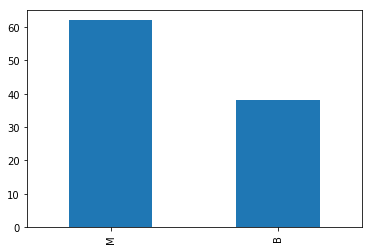

In [5]:
# Visualizando a distribuição de classes
print(data['diagnosis_result'].value_counts())
p=data['diagnosis_result'].value_counts().plot(kind="bar")

### 2.2 Verificando os tipos de atributos e se o dataset possui missing values

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
id                   100 non-null int64
diagnosis_result     100 non-null object
radius               100 non-null int64
texture              100 non-null int64
perimeter            100 non-null int64
area                 100 non-null int64
smoothness           100 non-null float64
compactness          100 non-null float64
symmetry             100 non-null float64
fractal_dimension    100 non-null float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [115]:
data.isnull().sum()

id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

In [9]:
data['radius'].isnull().sum()

0

### 2.3 Explorando os atributos

In [10]:
data.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


### 2.4 Boxplot

- Valor máximo
- Terceiro quartil (Q3)
- Segundo quartil (mediana)
- Primeiro quartil (Q1)
- Valor mínimo

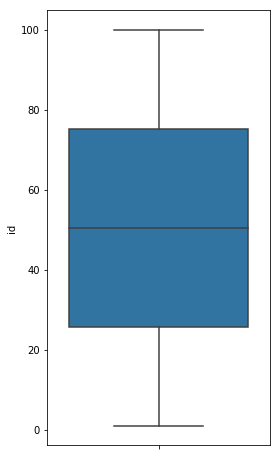

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(4,8))
ax = sns.boxplot(x=data["id"], orient='v' )
plt.show()

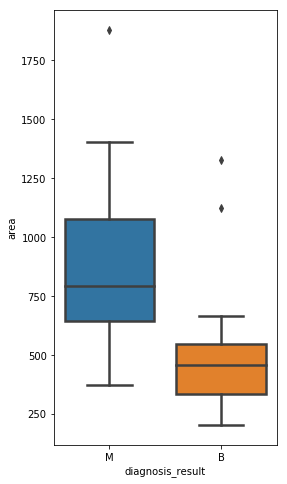

In [118]:
plt.figure(figsize=(4,8))
ax = sns.boxplot(x="diagnosis_result", y="area", data=data, linewidth=2.5)
plt.show()

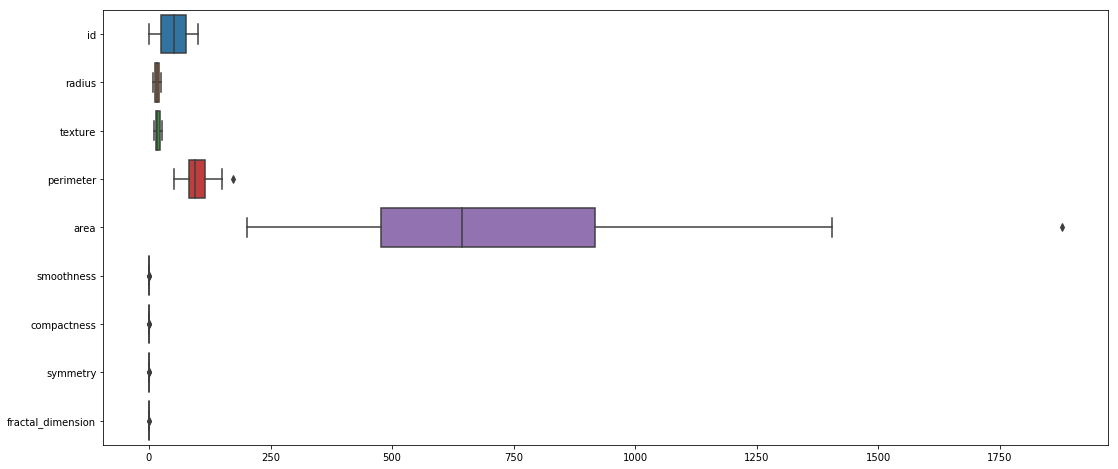

In [53]:
plt.figure(figsize=(18,8))
ax = sns.boxplot(data=data, orient="h")
plt.show()

### 2.5 Pre-processing

#### 2.5.1 StandartScaler

Centraliza a média e faz com que as features tenham variância de 1.

In [96]:
from sklearn import preprocessing
scaled_data = preprocessing.scale(data[data.columns[2:]])
print(scaled_data)

[[ 1.26683005e+00 -1.20574648e+00  2.30161118e+00  7.89416627e-01
   2.76420965e+00  2.48697022e+00  1.59415115e+00  1.76446414e+00]
 [-1.61701072e+00 -1.01220772e+00  1.53752042e+00  1.95882960e+00
   2.76420965e+00 -7.84061332e-01 -3.97313527e-01 -9.48199109e-01]
 [ 8.54852801e-01  1.69733493e+00  1.41017196e+00  1.57216886e+00
   1.52865530e+00  5.47363571e-01  4.51507484e-01 -5.78290484e-01]
 [-5.87067586e-01 -4.31591436e-01 -7.97201366e-01 -9.96138662e-01
  -2.24664966e+00  2.58559429e+00  2.18179647e+00  3.98391589e+00]
 [-1.61701072e+00  1.49024846e-01  1.62241939e+00  1.86766568e+00
   2.62692583e+00  1.03555270e-01 -3.97313527e-01 -7.01593359e-01]
 [ 1.67880731e+00  1.31025741e+00 -5.84953931e-01 -7.10072586e-01
   1.73458102e+00  7.11737016e-01  5.16801408e-01  1.39455552e+00]
 [-1.75090333e-01  1.50379617e+00  9.85677088e-01  1.05976479e+00
  -5.30601951e-01 -2.90940997e-01 -4.62607451e-01 -9.48199109e-01]
 [-3.81078959e-01 -4.45139150e-02 -2.87807522e-01 -3.92570677e-01
   

In [97]:
scaled_features = pd.DataFrame(scaled_data, columns=data.columns[2:])
scaled_features.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1.266830,-1.205746,2.301611,0.789417,2.764210,2.486970,1.594151,1.764464
1,-1.617011,-1.012208,1.537520,1.958830,2.764210,-0.784061,-0.397314,-0.948199
2,0.854853,1.697335,1.410172,1.572169,1.528655,0.547364,0.451507,-0.578290
3,-0.587068,-0.431591,-0.797201,-0.996139,-2.246650,2.585594,2.181796,3.983916
4,-1.617011,0.149025,1.622419,1.867666,2.626926,0.103555,-0.397314,-0.701593


In [65]:
scaled_features.describe()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,-2.969847e-16,-8.437695e-17,-6.911138e-17,2.775558e-17,-1.019740e-15,-1.373901e-16,-1.178502e-15,4.868328e-16
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-1.617011e+00,-1.399285e+00,-1.900888e+00,-1.574558e+00,-2.246650e+00,-1.457992e+00,-1.899074e+00,-1.441411e+00
25%,-9.990448e-01,-8.186690e-01,-6.061787e-01,-7.108585e-01,-6.335648e-01,-7.594053e-01,-6.911362e-01,-7.015934e-01
50%,3.089829e-02,-1.412833e-01,-1.180096e-01,-1.850942e-01,-5.010859e-02,-1.347862e-01,-1.034909e-01,-2.083819e-01
75%,8.548528e-01,7.780258e-01,7.415925e-01,6.731040e-01,6.363105e-01,4.980515e-01,5.168014e-01,5.314354e-01
max,1.678807e+00,1.697335e+00,3.193050e+00,3.694088e+00,2.764210e+00,3.588272e+00,3.618263e+00,3.983916e+00


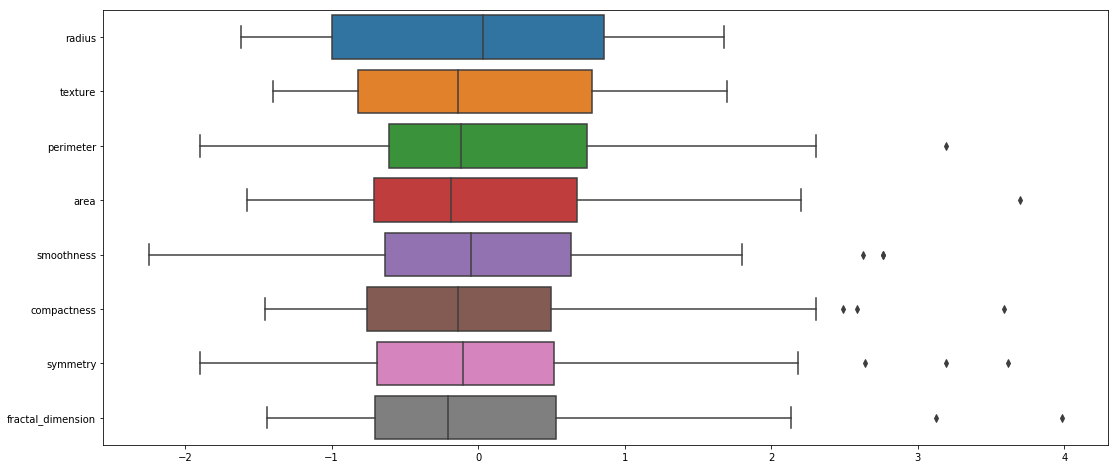

In [68]:
plt.figure(figsize=(18,8))
ax = sns.boxplot(data=scaled_features, orient="h")
plt.show()

#### 2.5.2 MinMaxScaler

Features entre 0 e 1.

In [76]:
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax_data = minmax_scaler.fit_transform(data[data.columns[2:]])
print(minmax_data)

[[0.875      0.0625     0.825      0.44868735 1.         0.78175896
  0.63313609 0.59090909]
 [0.         0.125      0.675      0.67064439 1.         0.13355049
  0.27218935 0.09090909]
 [0.75       1.         0.65       0.59725537 0.75342466 0.39739414
  0.4260355  0.15909091]
 [0.3125     0.3125     0.21666667 0.1097852  0.         0.80130293
  0.73964497 1.        ]
 [0.         0.5        0.69166667 0.65334129 0.97260274 0.30944625
  0.27218935 0.13636364]
 [1.         0.875      0.25833333 0.16408115 0.79452055 0.42996743
  0.43786982 0.52272727]
 [0.4375     0.9375     0.56666667 0.5        0.34246575 0.23127036
  0.26035503 0.09090909]
 [0.375      0.4375     0.31666667 0.22434368 0.67123288 0.41368078
  0.50295858 0.5       ]
 [0.625      0.8125     0.3        0.18973747 0.78082192 0.50488599
  0.59171598 0.47727273]
 [1.         0.         0.26666667 0.16348449 0.67123288 0.65798046
  0.40236686 0.65909091]
 [0.9375     0.625      0.425      0.35560859 0.16438356 0.09446254
  

In [77]:
minmax_features = pd.DataFrame(minmax_data, columns=data.columns[2:])
minmax_features.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,0.8750,0.0625,0.825000,0.448687,1.000000,0.781759,0.633136,0.590909
1,0.0000,0.1250,0.675000,0.670644,1.000000,0.133550,0.272189,0.090909
2,0.7500,1.0000,0.650000,0.597255,0.753425,0.397394,0.426036,0.159091
3,0.3125,0.3125,0.216667,0.109785,0.000000,0.801303,0.739645,1.000000
4,0.0000,0.5000,0.691667,0.653341,0.972603,0.309446,0.272189,0.136364


In [78]:
minmax_features.describe()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.490625,0.451875,0.373167,0.298854,0.448356,0.288925,0.344201,0.265682
std,0.304943,0.324560,0.197301,0.190758,0.200572,0.199165,0.182160,0.185249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.187500,0.187500,0.254167,0.163932,0.321918,0.138436,0.218935,0.136364
50%,0.500000,0.406250,0.350000,0.263723,0.438356,0.262215,0.325444,0.227273
75%,0.750000,0.703125,0.518750,0.426611,0.575342,0.387622,0.437870,0.363636
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


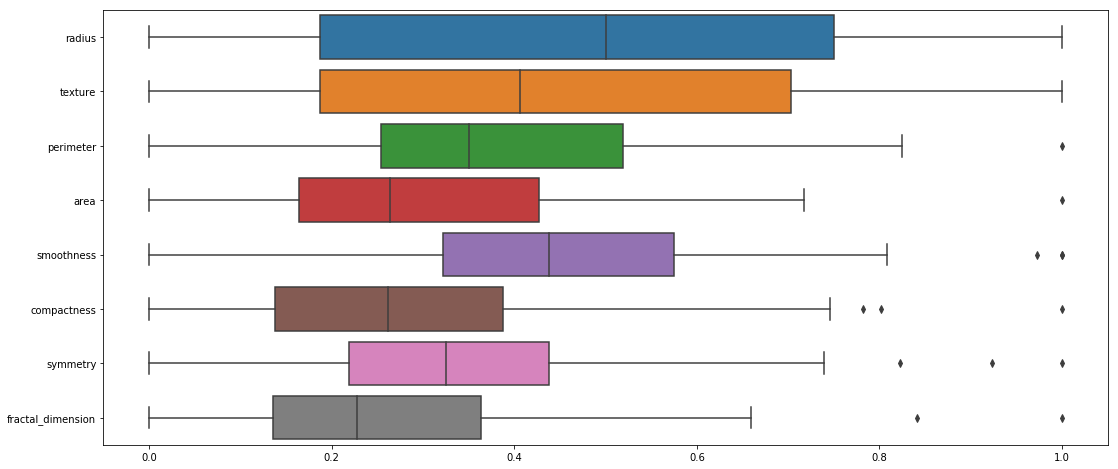

In [79]:
plt.figure(figsize=(18,8))
ax = sns.boxplot(data=minmax_features, orient="h")
plt.show()

In [126]:
# Concatenando a coluna diagnosis_result com o dataset das features 
features_data = pd.concat([data['diagnosis_result'],scaled_features],axis=1)
features_data.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,1.266830,-1.205746,2.301611,0.789417,2.764210,2.486970,1.594151,1.764464
1,B,-1.617011,-1.012208,1.537520,1.958830,2.764210,-0.784061,-0.397314,-0.948199
2,M,0.854853,1.697335,1.410172,1.572169,1.528655,0.547364,0.451507,-0.578290
3,M,-0.587068,-0.431591,-0.797201,-0.996139,-2.246650,2.585594,2.181796,3.983916
4,M,-1.617011,0.149025,1.622419,1.867666,2.626926,0.103555,-0.397314,-0.701593


In [127]:
# Criando um novo dataset 
features_data = pd.melt(features_data,id_vars="diagnosis_result",
                    var_name="features",
                    value_name='value')
print(features_data.shape)
features_data.head()

(800, 3)


,diagnosis_result,features,value
0,M,radius,1.266830
1,B,radius,-1.617011
2,M,radius,0.854853
3,M,radius,-0.587068
4,M,radius,-1.617011


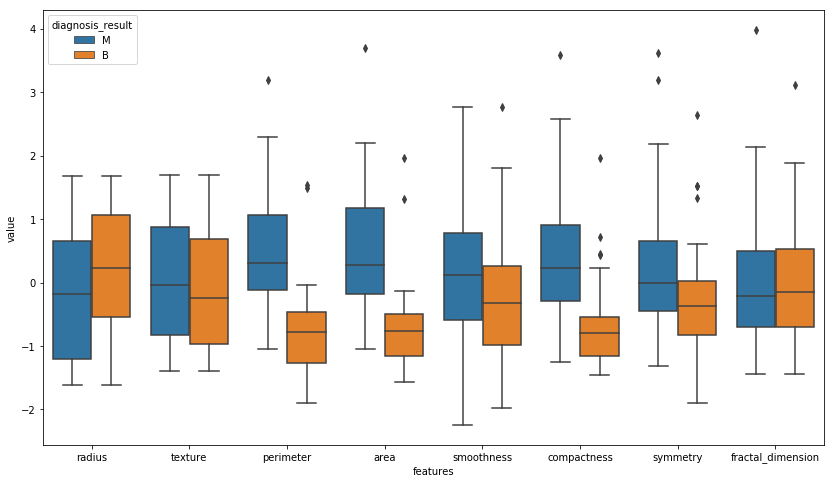

In [128]:
plt.figure(figsize=(14,8))
sns.boxplot(x="features", y="value", hue="diagnosis_result", data=features_data)
plt.show()

### 2.6 Violinplot

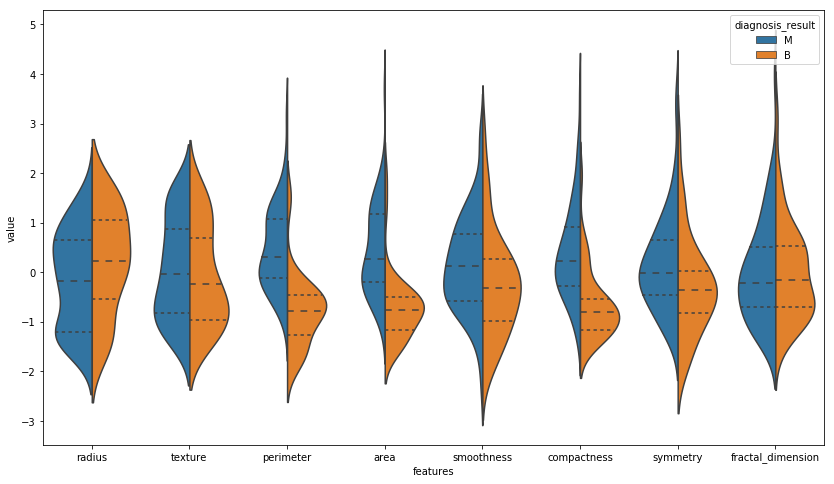

In [129]:
plt.figure(figsize=(14,8))
sns.violinplot(x="features", y="value", hue="diagnosis_result", data=features_data, split=True, inner="quart")
plt.show()

### 2.7 Swarmplot

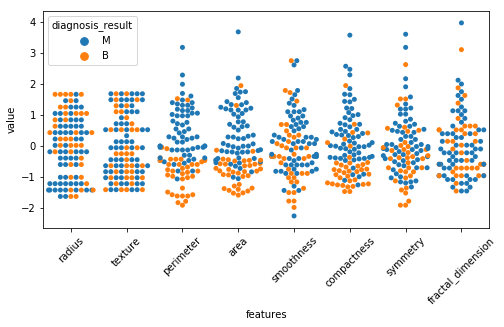

In [130]:
plt.figure(figsize=(8,4))
sns.swarmplot(x="features", y="value", hue="diagnosis_result", data=features_data)
plt.xticks(rotation=45)
plt.show()

### 2.8 Analisando a correlação entre features que parecem similares

In [132]:
data['perimeter'].corr(data['area'])

0.9766480772456855

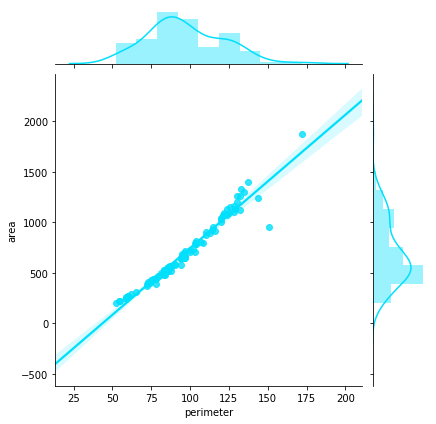

In [133]:
sns.jointplot(data['perimeter'], data['area'], kind="regg", color="#00DFFC")
plt.show()

### Analisando a correlação entre as features a partir da matriz de correlação

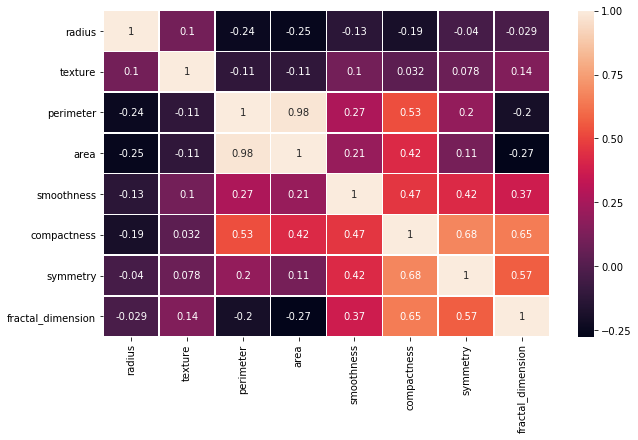

In [145]:
plt.subplots(figsize=(10, 6))
sns.heatmap(data[data.columns[2:]].corr(), annot=True, linewidths=.5)
plt.show()

# Cenas dos próximos capítulos : Lidando com outliers + Feature Selection

## Comentários ou Dúvidas?

- Email: <suporte@viniciusgalvaoia.com.br>
- Site: http://viniciusgalvaoia.com.br

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline